# Projekt - Uvod u znanost o podacima 
U sklopu ovog dokumenta implementiran je projektni zadatak kolegija "Uvod u znanost o podacima" na Faklutetu elektrotehnike i računarstva. Cilj ovog projekta je replicirati te na kraju poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease."

# Opis projektnog zadataka
Cilj ovog projektnog zadatka je replicirati te zatim poboljšati temu znanstvenog rada "Implementation of Machine Learning Model to Predict Heart Failure Disease". Svrha spomenutog znanstvenog rada je razviti prediktivne modele u području medicine. U radu su implementirani ML algoritmi za predikciju srčanih bolesti. Podatkovni skup rada predstavlja podatke pacijenata.

Projekt je podjeljen na tri dijela:
 - 1. Priprema i vizualizacija podataka
 - 2. Replikacija rezultata
 - 3. Poboljšanje rezultata
 


# 1. Priprema podataka

Podaci su početni korak svakog modela strojnog učenja, stoga potrebno je učitati i upoznati se s tim podacima. Podkatkovni skup koji se koristi u implementaciji ovog projekta je "Heart Failure Prediction Dataset" , dostupan na sljedećoj poveznici: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Prvi korak je učitati podatke. To ćemo učinit putem Python biblioteke - "Pandas".

In [7]:
#Importing the necessery libarys
import pandas as pd
import numpy as np

U varijablu *data_set* ćemo učitati podatkovni skup. Pogledajmo dimenzije te varijable

In [8]:
data_set=pd.read_csv("data/heart_cleveland_upload.csv")
print("The dimension of data set is : ",data_set.shape)

The dimension of data set is :  (297, 14)


Kao što je evidentno u prijašnjem ispisu, vidimo da raspolažemo s 297 podatka , gdje je svaki od njih opisan sa 14 varijabli.
Na raspolaganju nemamo veliku količinu podatka , s obzirom da su modeli strojnog učenja nekada trenirani na podatkovnim skupovima od nekoliko milijona zapisa. Bez obira na malu količinu zapisa , i dalje možemo razviti adekvatan model strojnog učenja uz uvijet da su podaci u cijelosti ispravni. Prije provjere ispravnosti podataka pogledajmo pobliže prirodu našeg podatkovnog skupa.

In [9]:
print("Name of the columns: ",list(data_set.columns))

Name of the columns:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


Imena stupaca su engleske kratice koje opisuju pacijenta i njegovo zdravstveno stanje. Značenje pojedinog stupca se nalazi ispod:
- "age" = Starost ispitanika.
- "sex" = Spol ispitanika.
- "cp" = Razina boli u plućima
- "trestbps" = Vrijednost krvnog tlaka ispitanika.
- "chol" = Razina kolesterola ispitanika
- "fbs" = Razina šećera u krvi
- "restecg" = Rezultat ECG-a pacijeta
- "thalach" = Najveća vrijednost otkucaja srca u pacijenta.
- "Exang" = Zastavica , koja govori da li vježba uzrokuje upalu grla
- "oldpeak" = Vrijednost koja predstavlja utjecaj depresije na pacijenta.
- "slope" = Zastavica koja predstavlja stanje ispitanika tijekom fizičke aktivnosti
- "ca" = Vrijednost statusa fluoroskopija
- "thal" = Rezultati Thallium testa (testa za pacijente s poteškoćama u disanju).
- "condition" = Label stupac, koji govori da li je pacijent podložan zastoju srca.

Sada kada smo se upoznali kako su varijable opisane, pogledajmo s kojim tipom podataka raspolažemo.

In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Iz gornjog ispisa vidljivo je da raspolažemo isključvo sa numeričkim podacima. Važno je naglasiti da se par varijabli se koriste kao klasifikatori kao što su varijable : condition,sex,cp,fbs... Iz gornjeg ispisa također vidimo da podaci koji predstavljaju kategorije su već u int64 formatu. To je važno. jer sve kategorijske i binarne varijable u podatkovnom skupu moraju biti numeričkog tipa. U slučaju da nisu bile int64 tipa, to bismo morali ispraviti koristeći OneHotEncoder i LabelEncoder.
U gornjem ispisu možemo također zaključiti da u našem podatkovnom skupu nisu prisutne nedostajuće vrijednosti. NaN vrijednosti mogu predstavljati veliku opasnost u izradi modela strojnog učenja i oni zahtjevaju delikatno rukovanje. Moguće ih je zamijeniti s srednjom vrijednosti ili medijanom. Taj proces ovdje nećemo raditi jer nije potreban.
Pogledajmo sada ponašanje naših numeričkih podataka.

In [11]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Tablica iznad nam daje dobar pregled ponašanja svih varijabli. Također može vidjeti da postoje dva kandidata za tkz. stršeće vrijednosti. To su varijable "chol" , i "oldpeak". Uočimo da maksimalna vrijednost varijable "chol" i "oldpeak" mnogo odstupa od ostalih vrijednosti tih varijabla. Pogledajmo dodatno ponašanje tih varijabla ,ali ovaj put putem box-plot grafa.Box-plot se sastoji od pravokutnika koji prikazuje podatke od donjeg do gornjeg kvartila. Izgled box-plota ukazuje na stupanj
raspršenosti i asimetričnosti, te može pokazati outliere medu podacima.
Prvo ćemo ispitati vrijednost "chol" varijable , zatim vrijednost "oldpeak".

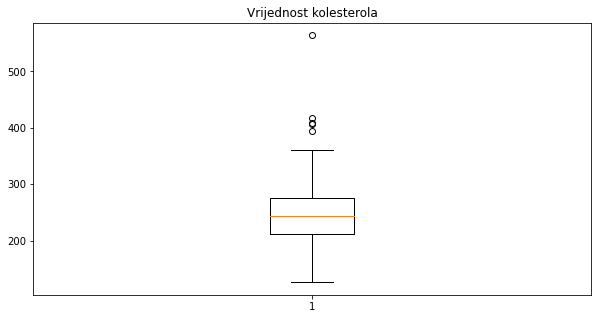

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 5))
plt.title("Vrijednost kolesterola")
plt.boxplot(data_set["chol"])
# show plot
plt.show()

Iz gornjeg grafa vidljivo je da maksimalna vrijednost varijable "chol" predstavlja outlier. Pogledajmo bolje o kojem zapisu je točno riječ.

In [15]:
print(data_set[data_set["chol"]==564])

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
79   67    0   2       115   564    0        2      160      0      1.6   

    slope  ca  thal  condition  
79      1   0     2          0  


Outlieri unutar podatkovnog skupa mogu predstavljati neispravne podatke. Ovdje se radi o jednom zapisu kojeg možemo izbrisati jer nosi potencijalno ne ispravane informacije.Nakon brisanja pogledajmo ponovno ponašanje varijable "chol"

In [16]:
data_set.drop(data_set.index[(data_set["chol"]==564)],axis=0,inplace=True)
data_set["chol"].describe()

count    296.000000
mean     246.280405
std       48.701920
min      126.000000
25%      211.000000
50%      242.500000
75%      275.250000
max      417.000000
Name: chol, dtype: float64

Istu stvar ćemo sada napraviti za varijablu "oldpeak", koja predstavlja utjecaj depresije u pacijenta. Pogledajmo ponašanje te varijable na box-plot grafu.

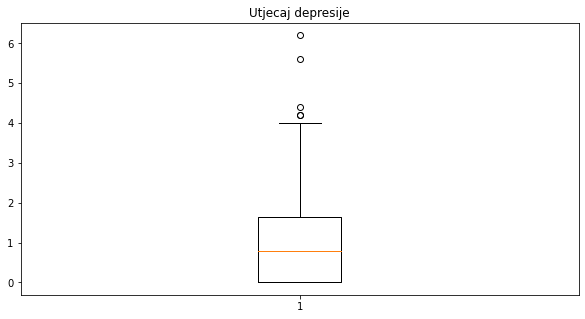

In [17]:
plt.figure(figsize =(10, 5))
plt.title("Utjecaj depresije")
plt.boxplot(data_set["oldpeak"])
# show plot
plt.show()

Vidimo da samo dva pacijenta imaju izrazito veliku vrijednost ove varijable. Prije brisanja ovih podataka prikažimo te podatke u cijelosti

In [18]:
print(data_set[data_set["oldpeak"]>5])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
186   62    0   3       160   164    0        2      145      0      6.2   
239   55    1   3       140   217    0        0      111      1      5.6   

     slope  ca  thal  condition  
186      2   3     2          1  
239      2   0     2          1  


Utjecaj depresije je osjetljiva informacija kod osobe. Možemo pretpostaviti da visoka vrijednost te varijable u ova dva pacijenta je povezana za visokom šansom zastoja srca (conidtion=1). Zbog osjetljive prirode ove varijable, ove zapise ćemo ostaviti u našem skupu.

Ispitajmo sada kolinearnost u našem podatkovnom skupu putem kolinerane matrice.

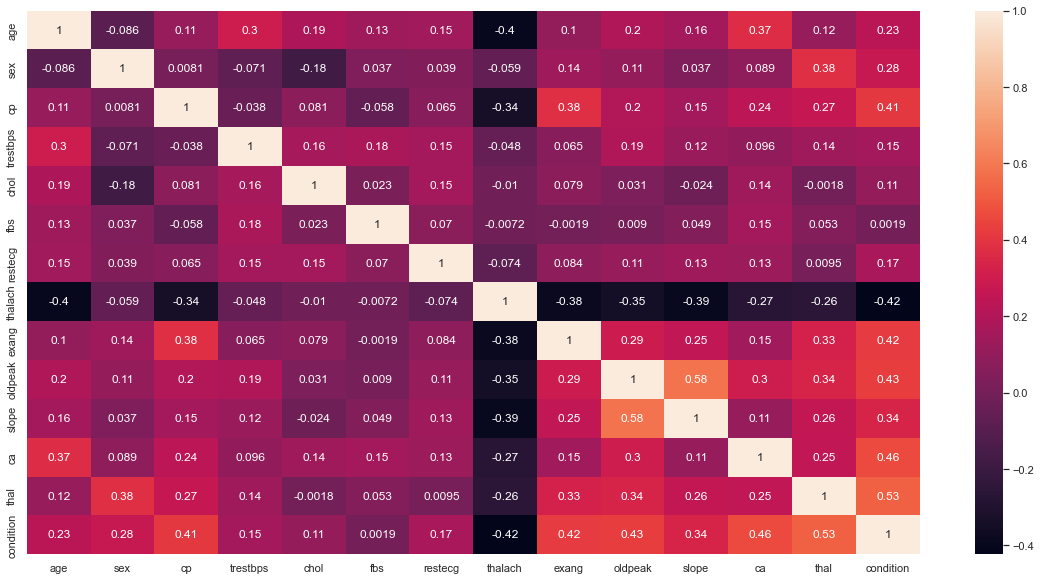

In [22]:
import seaborn as sns
corr_matrix = data_set.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

U našem podatkovnom skupu nije prisutna kolinearnost između značajki. To znači da nećemo izbacivati značajke iz našeg podatkovnog skupa.

Pogledajmo sada prisustvo monotonih varijabla u našem podatkovnom skupu.

In [23]:
data_set.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         151
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

Funkcija nunique broji jedinstvene vrijednosti po stupcima i može služiti kao dobar indikator monotonih atributa.Iz ovog možemo zaključiti da naš podatkovni skup ne sadrži monotone varijable koje je potrebno izbaciti iz skupa podataka.

Podsjetimo se što smo sve do sad radili. Učitali smo podatkovni skup, te na istom pregledali prisustvo nedostajućih,stršećih,korelacijskih i monotonih varijabla. Nakon svega toga možemo reći da je naš podatkovni skup ispravan i potpun. Nakon što smo se upoznali sa našim podacima sada ćemo iste vizualizirati.

# 2. Vizualizacija podataka

Prvi stupac u našem podatkovnom skupu predstavlja starost ispitanika. Pogledajmo bolje ponašanje te varijable. Na sljedećem histogramu prikazan je broj pacijenata grupiran po starosti.

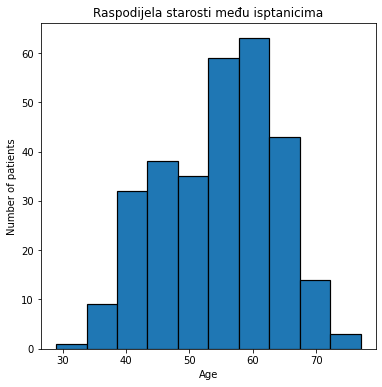

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(data_set["age"], edgecolor='black',linewidth=1.2)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Raspodijela starosti među isptanicima')
plt.show()


Evidentno je da većina ispitanika su starije životne dobi. Nadalje pogledajmo omjer muških i ženskih ispitanika u našem podatkovnom skupu.

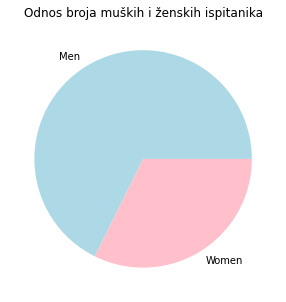

In [7]:
MF=data_set['sex'].value_counts()
MF.columns=["Men","Women"]
plt.figure(figsize=(5,5))
plt.pie(data_set['sex'].value_counts(),labels=["Men","Women"],colors=["lightblue","pink"],)
plt.title("Odnos broja muških i ženskih ispitanika")
plt.show()

Broj muškaraca je znatno veći od broja žena.
Zadnji stupac u podatkovnom skupu predstavlja binarnu varijablu, gdje vrijednost 0 predstavlja slabu vjerojatnost za zastoj srca kod pacijenta, a vrijednost 1 visoku vjerojatnost.
Prvo pogledajmo zastupljenost visoke i niske šanse za zastoj srca kod muškaraca i žena.

[112, 89]
[25, 71]


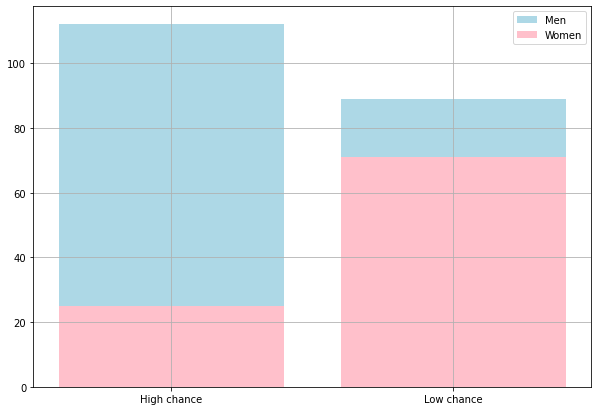

In [8]:
men_with_highC_HF=data_set[data_set["sex"]==1]
men_with_highC_HF=men_with_highC_HF[men_with_highC_HF['condition']==1]

women_with_highC_HF=data_set[data_set["sex"]==0]
women_with_highC_HF=women_with_highC_HF[women_with_highC_HF['condition']==1]

##Calculate data with low chance of heart-failure
men_with_lowC_HF=data_set[data_set["sex"]==1]
men_with_lowC_HF=men_with_lowC_HF[men_with_lowC_HF['condition']==0]

women_with_lowC_HF=data_set[data_set["sex"]==0]
women_with_lowC_HF=women_with_lowC_HF[women_with_lowC_HF['condition']==0]

men=[len(men_with_highC_HF),len(men_with_lowC_HF)]
women=[len(women_with_highC_HF),len(women_with_lowC_HF)]

print(men)
print(women)
x_asis=["High chance","Low chance"]
plt.figure(figsize=(10,7))
plt.bar(x_asis, men, color='lightblue', label='Men')
plt.bar(x_asis, women, color='pink', label='Women')
plt.legend(loc='best')
plt.grid()

Iz iznad prikazanog bar-charta možemo zaključiti da je veća vjerojatnost zastoja srca je kod muškaraca nego kod žena.Također vrijedi suprotno, mala šansa zastoja srca je više vjerojatnija za žene. Na temelju ovih rezultata iz desktiptivnog grafa možemo smatrati spol ispitanika kao prediktorsku varijablu koja može utjecati na izlaz modela strojnog učenja kojeg ćemo razviti u nastavku.

Prilikom opisa podatkovnog skupa naglasili smo da stupac "cp" predstavlja razinu boli u plućima kod pacijenat. Intuitivno je pretpostaviti da će ta vrijednost biti veća za ispitanika kod kojih je visoka šansa za zastoj srca. Progledajmo koliko je ta pretpostavka točna u našem podatkovnom skupu. U svrhu ostvarivanja temeljite vizualizacije, taj podatak ćemo prikazati odvojeno za muške i ženske ispitanike.

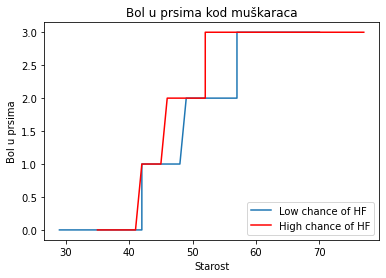

<Figure size 720x720 with 0 Axes>

In [29]:
#Plot graph for men with low chance of HF and chest pain
men_lowC_cp = men_with_lowC_HF["cp"]
age_menLowCCP =np.array(men_with_lowC_HF['age'])
age_menLowCCP.sort()

plt.plot(age_menLowCCP,men_lowC_cp,label="Low chance of HF")

#Plot grapf with high chance of HF and chest pain , and compare results with previous graph
men_highC_cp = men_with_highC_HF["cp"]
age_menHighCCP =np.array(men_with_highC_HF['age'])
age_menHighCCP.sort()

plt.plot(age_menHighCCP,men_highC_cp,color="red", label="High chance of HF")
plt.title("Bol u prsima kod muškaraca")
plt.xlabel("Starost")
plt.ylabel("Bol u prsima")
plt.legend(loc="lower right")
plt.figure(figsize=(10,10))

women_highC_cp=women_with_highC_HF["cp"]
women_lowC_cp=women_with_lowC_HF["cp"]


<Figure size 720x720 with 0 Axes>

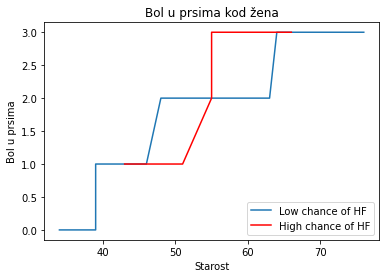

<Figure size 720x720 with 0 Axes>

In [30]:
#Plot graph for women with low chance of HF and chest pain
women_lowC_cp = women_with_lowC_HF["cp"]
age_womenLowCCP =np.array(women_with_lowC_HF['age'])
age_womenLowCCP.sort()

plt.plot(age_womenLowCCP,women_lowC_cp,label="Low chance of HF")

#Plot grapf with high chance of HF and chest pain , and compare results with previous graph
women_highC_cp = women_with_highC_HF["cp"]
age_womenHighCCP =np.array(women_with_highC_HF['age'])
age_womenHighCCP.sort()
plt.plot(age_womenHighCCP,women_highC_cp,color="red", label="High chance of HF")
plt.title("Bol u prsima kod žena")
plt.xlabel("Starost")
plt.ylabel("Bol u prsima")
plt.legend(loc="lower right")
plt.figure(figsize=(10,10))